# Exploratory analysis

## On a toy dataset

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA

sns.set_theme(font_scale=1.5)
sns.set_palette("colorblind")

In [106]:
iris = datasets.load_iris()

dtypes = {feat: np.float32 for feat in iris['feature_names']}
dtypes.update({"target": 'category'})
target_names = {i: name for i, name in enumerate(iris['target_names'])}

iris = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["species"]
)
iris["species"] = iris["species"].replace(target_names)
iris["species"] = iris["species"].astype("category")

In [107]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


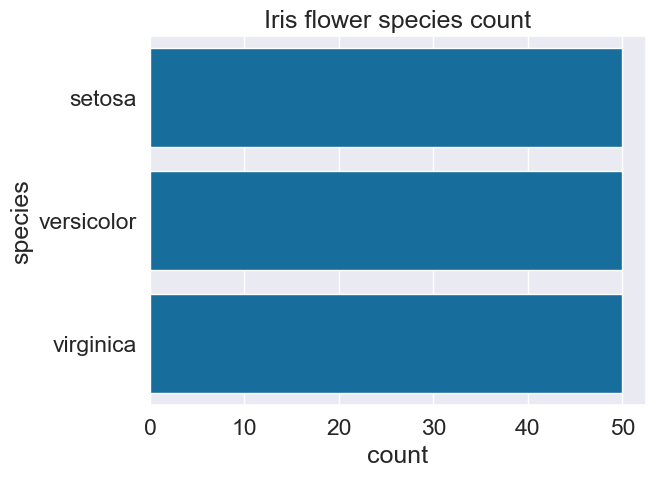

In [108]:
plt.title("Iris flower species count")
sns.countplot(iris["species"])
plt.savefig("imgs/iris_countplot.svg")

In [109]:
iris.groupby("species").agg(["mean", "median"])

C:\Users\stefa\AppData\Local\Temp\ipykernel_17204\3291858793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris.groupby("species").agg(["mean", "median"])


sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
species                                                                         
setosa                 5.006    5.0            3.428    3.4             1.462   
versicolor             5.936    5.9            2.770    2.8             4.260   
virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
species                                    
setosa       1.50            0.246    0.2  
versicolor   4.35            1.326    1.3  
virginica    5.55            2.026    2.0

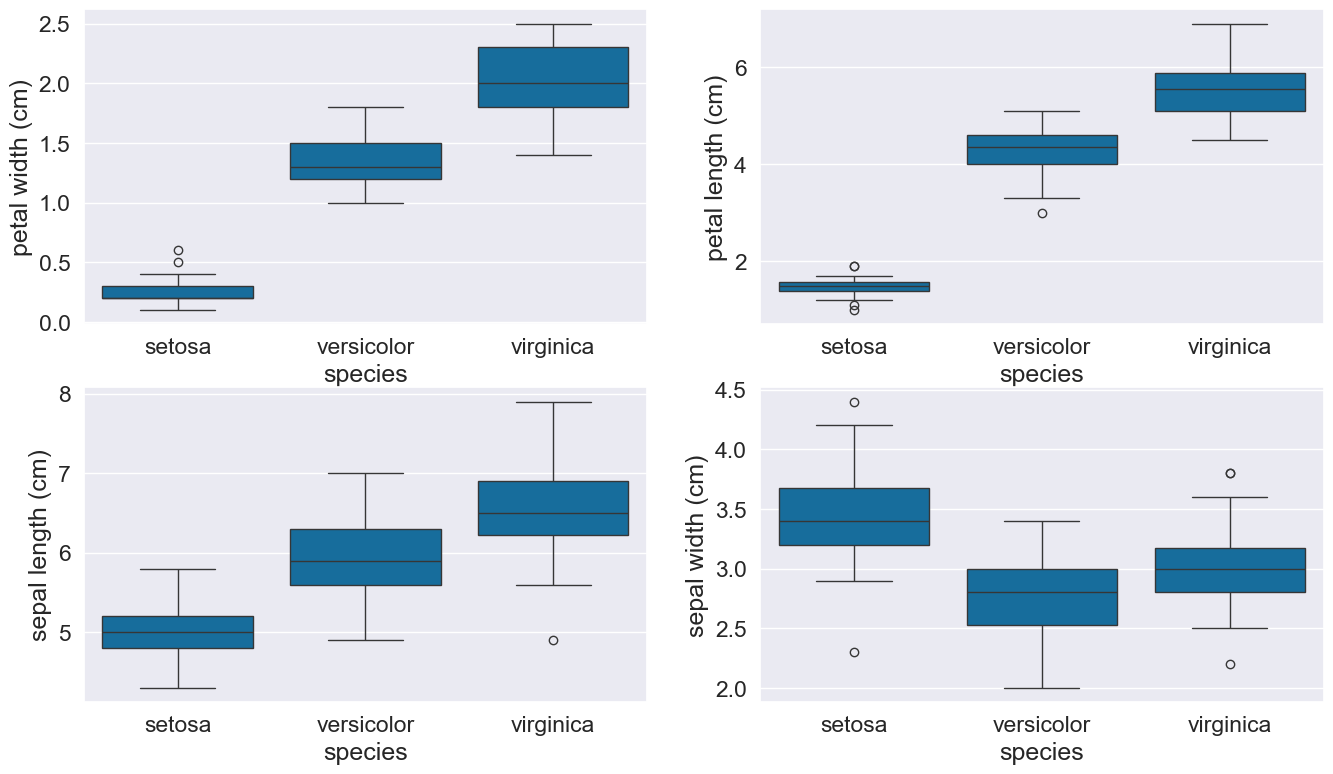

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y="petal width (cm)", x= "species", data=iris, orient="v" , ax=axes[0, 0])
sns.boxplot( y="petal length (cm)", x= "species", data=iris, orient="v" , ax=axes[0, 1])
sns.boxplot( y="sepal length (cm)", x= "species", data=iris, orient="v" , ax=axes[1, 0])
sns.boxplot( y="sepal width (cm)", x= "species", data=iris, orient="v" , ax=axes[1, 1])
plt.savefig("imgs/iris_boxplot.svg")

<Figure size 1700x900 with 0 Axes>

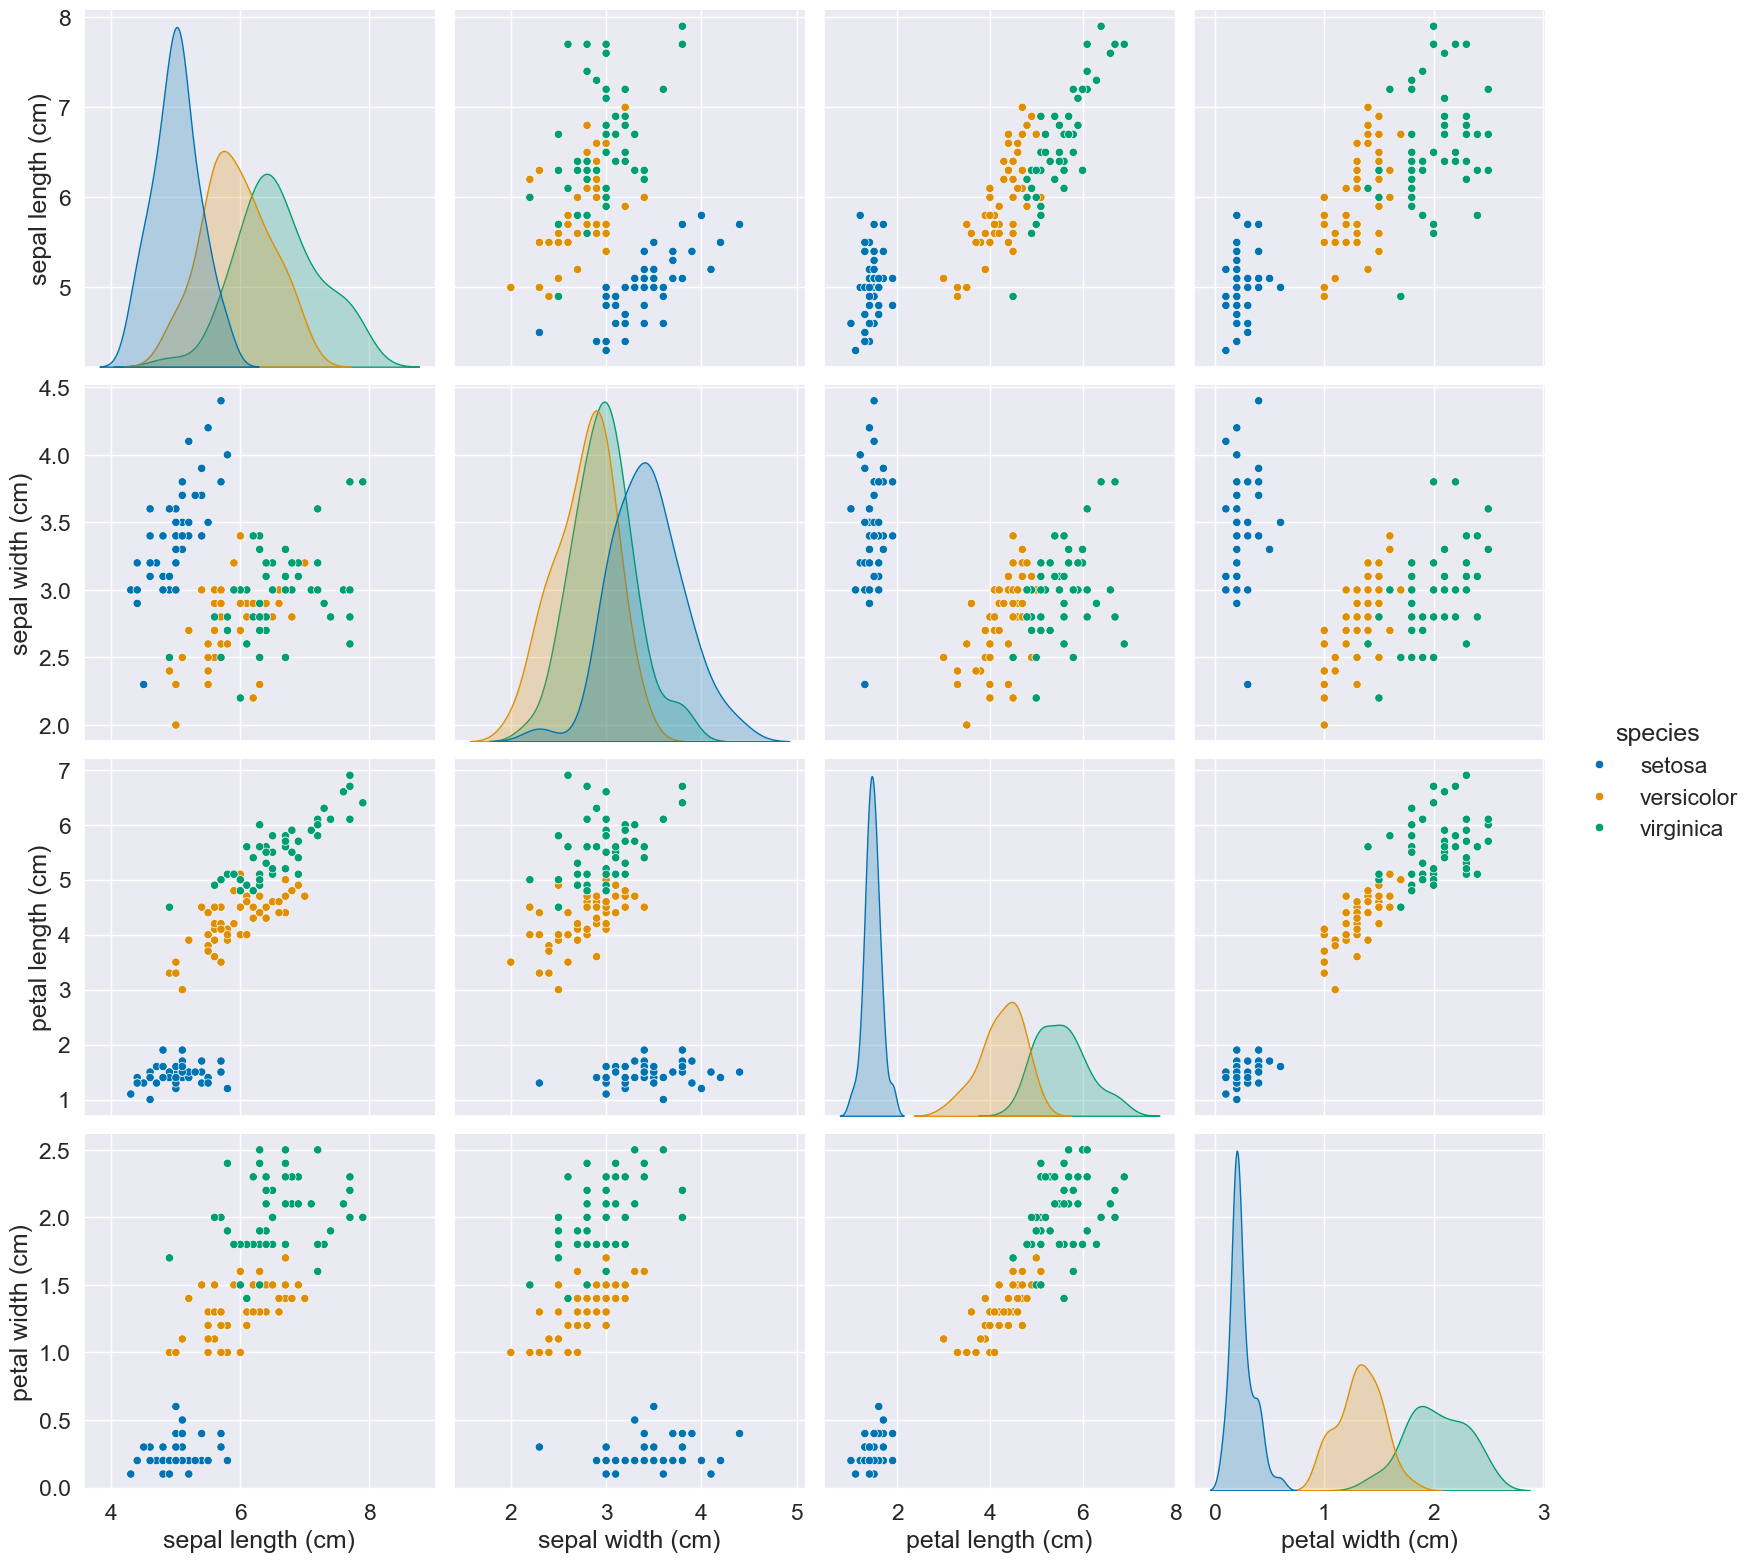

In [111]:
plt.figure(figsize=(17,9))
sns.pairplot(iris, hue="species", height=4)
plt.savefig("imgs/iris_pairplot.svg")

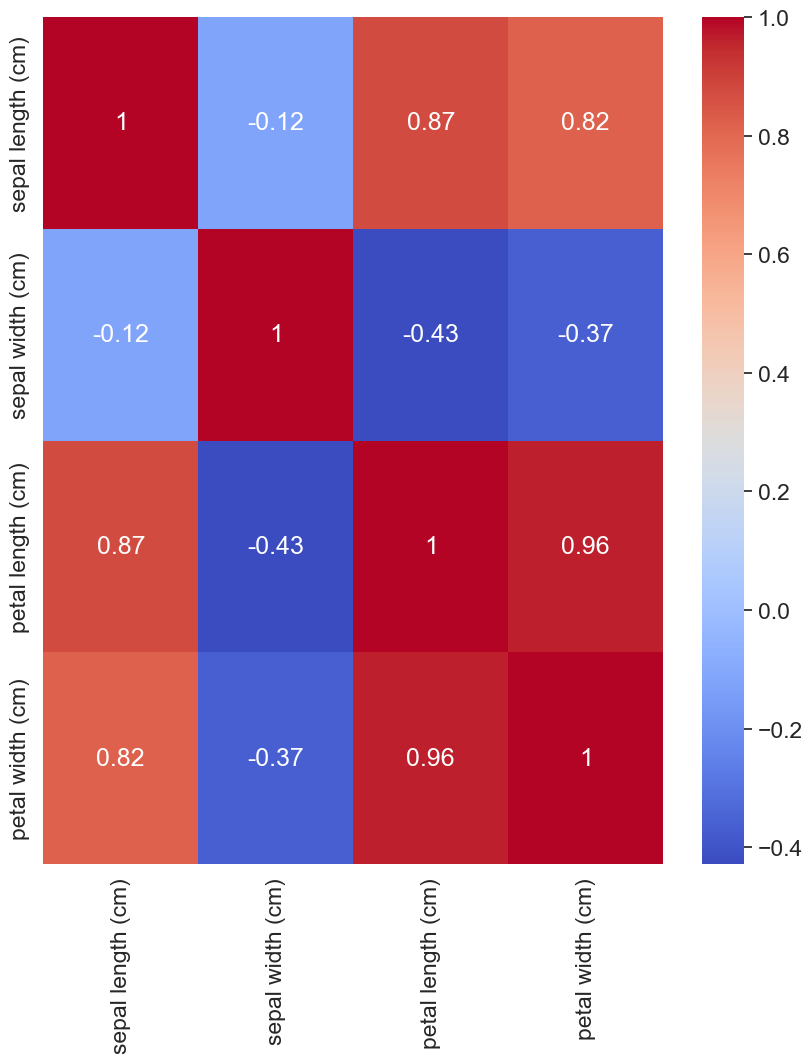

In [112]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.drop(columns="species").corr(),annot=True, cmap="coolwarm")
plt.savefig("imgs/iris_corrmap.svg")

In [153]:
iris["species"].cat.categories

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

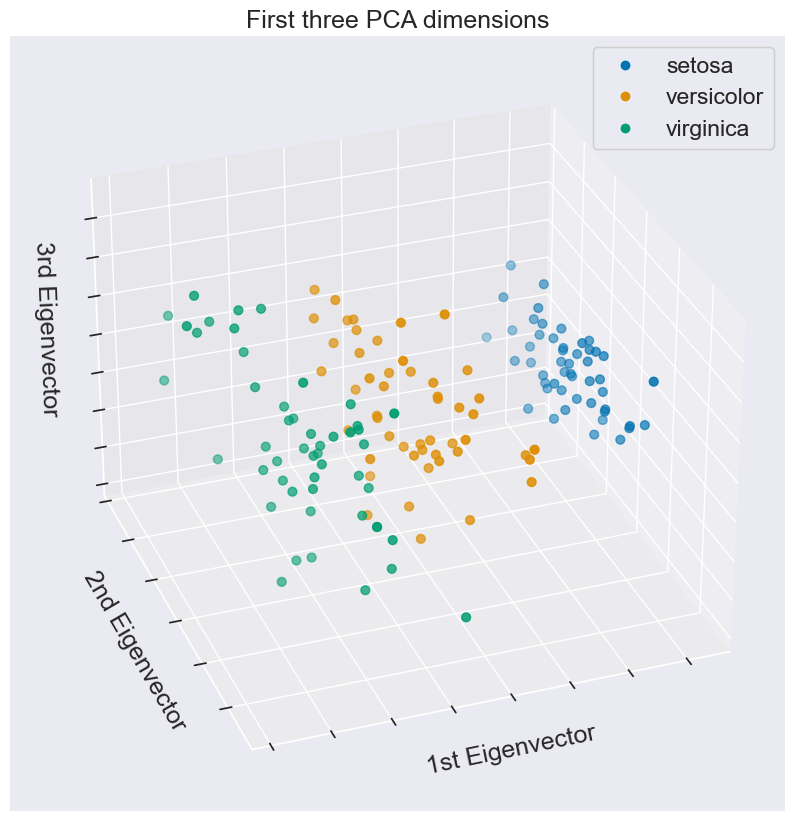

In [ ]:
fig = plt.figure(1, figsize=(10, 11))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.drop(columns="species"))
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris["species"].cat.codes.values,
    cmap=ListedColormap(sns.color_palette("colorblind").as_hex()[:3]),
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=list(iris["species"].cat.categories))
ax.add_artist(legend1)

plt.savefig("imgs/iris_pca.svg")